<a href="https://colab.research.google.com/github/usadhana025/Hands_on_ml/blob/master/Notebooks/titanic_ml_from_disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [11]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

### Getting the Data

In [20]:
from getpass import getpass

token = getpass('Enter your GitHub personal access token: ')
!git clone https://{token}@github.com/usadhana025/Hands_on_ml.git


Enter your GitHub personal access token: ··········
fatal: destination path 'Hands_on_ml' already exists and is not an empty directory.


In [21]:
!git clone git@github.com:usadhana025/Hands_on_ml.git


fatal: destination path 'Hands_on_ml' already exists and is not an empty directory.


In [22]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
csv_file_path = '/content/Hands_on_ml/Notebooks/titanic.csv'
df = pd.read_csv(csv_file_path)

Data dictionary


| Variable | Definition                                 | Key                                            |
| ---------|--------------------------------------------|------------------------------------------------|
| Survival | Passenger survives or not                  | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Gender                                     |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |`m

### Exploring the Data

In [31]:
# viewing the first few rows of the data
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [32]:
# what's the data size?
df.shape

(1309, 12)

In [33]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     1309 non-null   int64  
 11  Ticket       1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [34]:
# statistics of the dataset (numeric columns)
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.377387
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.484918
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [36]:
# statistics of the dataset (categorical columns)
df.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


In [38]:
# is the data imbalanced?
# normalizes the result and give fraction of code
df.Survived.value_counts(normalize=True)

,proportion
Survived,
0,0.622613
1,0.377387


#### Pairplot

''

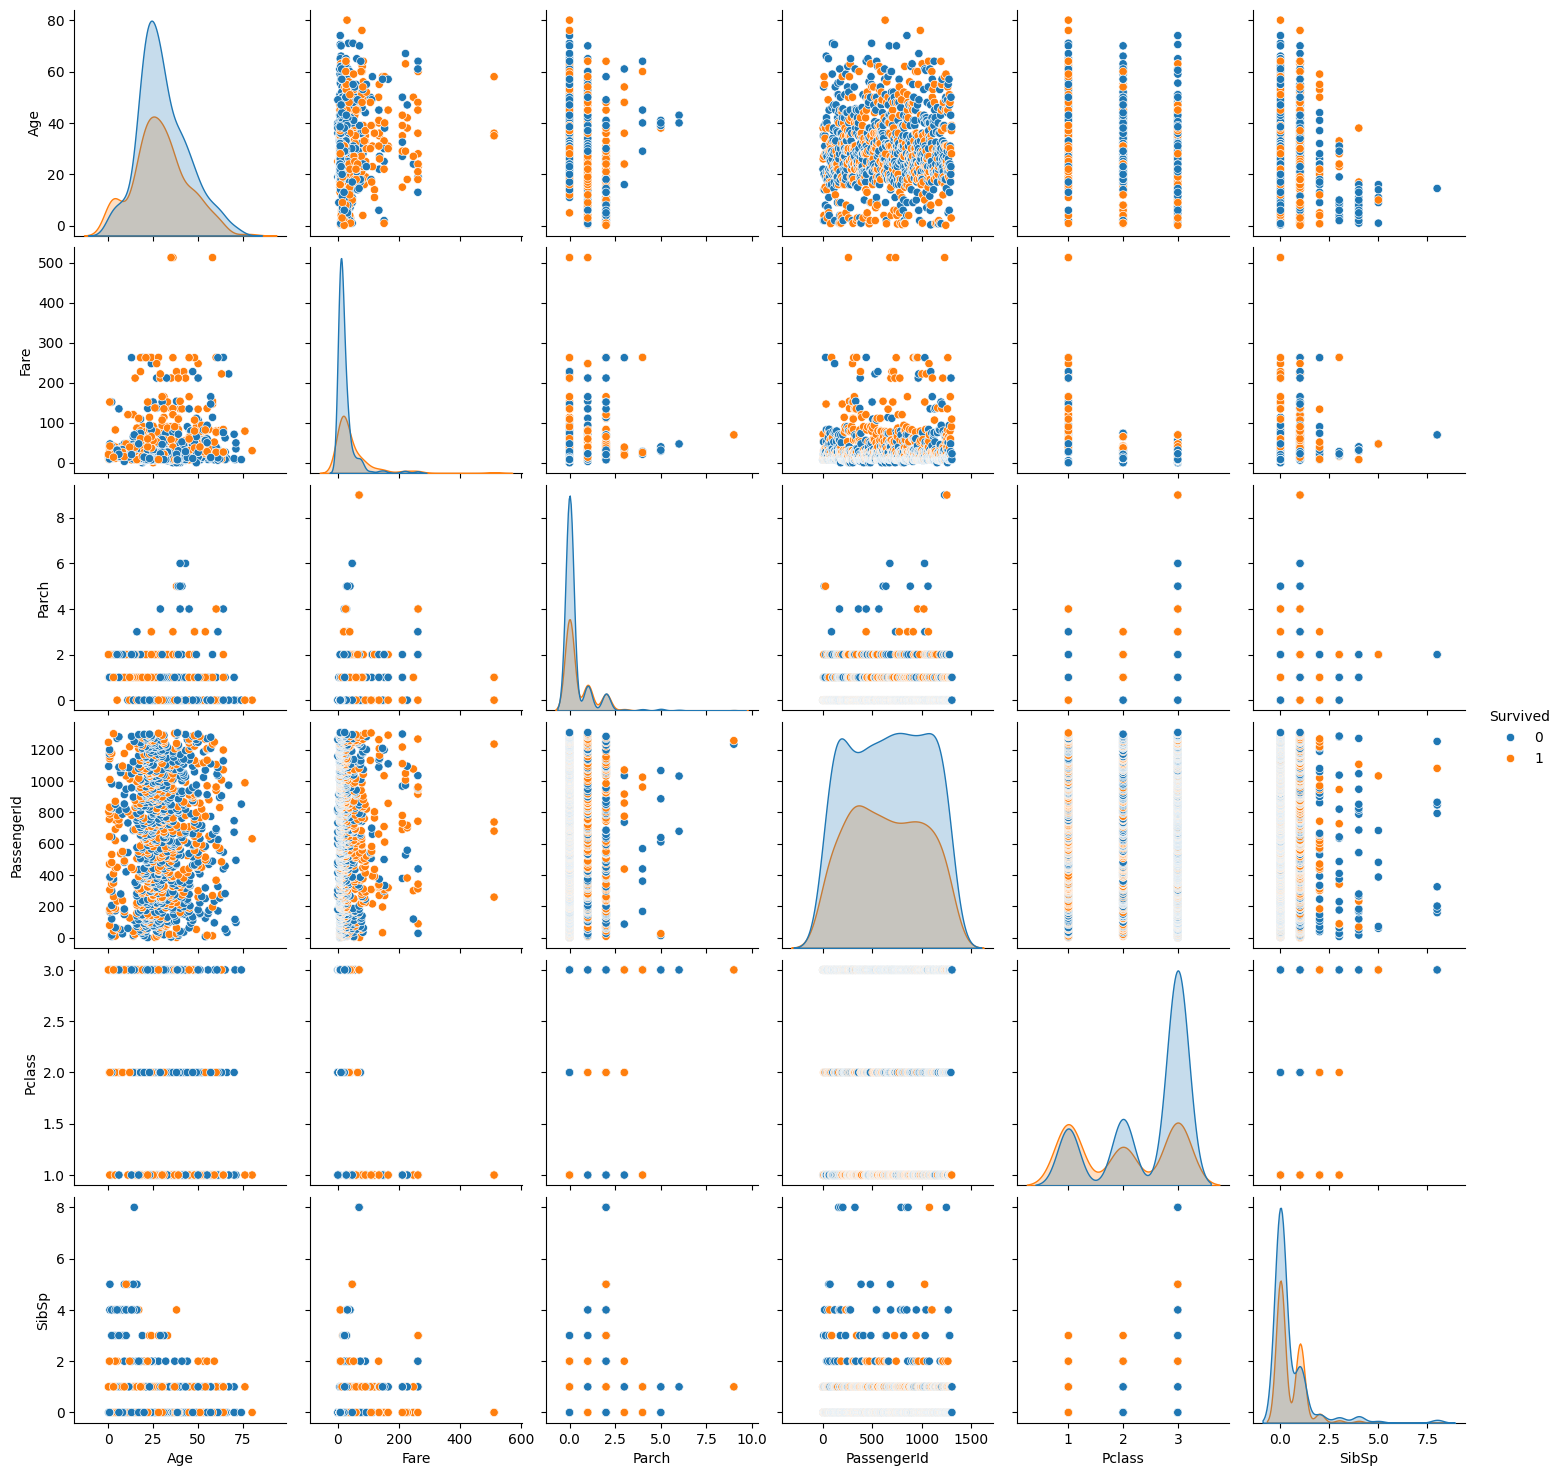

In [39]:
# ploting pairwise relationships in the dataset
sns.pairplot(df, hue='Survived')
,

#### Scatter Plot

''

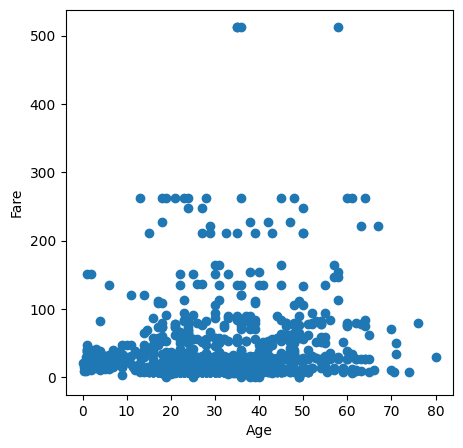

In [40]:
# useful for identifying relationship (i.e. correlation) between two parameters
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.Age, df.Fare)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
,

#### Pie Chart

''

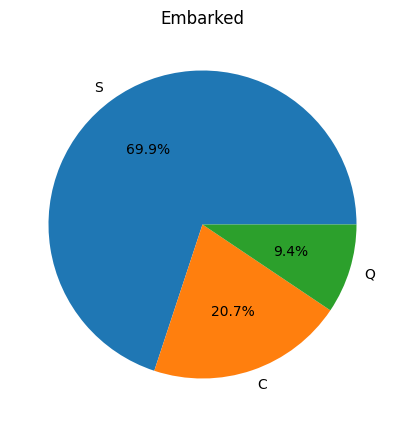

In [42]:
# useful for depicting proportional data with each slice of pie representing a specific category
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x=df.Embarked.value_counts(),
       labels=df.Embarked.value_counts().index,
       autopct='%1.1f%%')
ax.set_title('Embarked')
,

#### Bar Chart

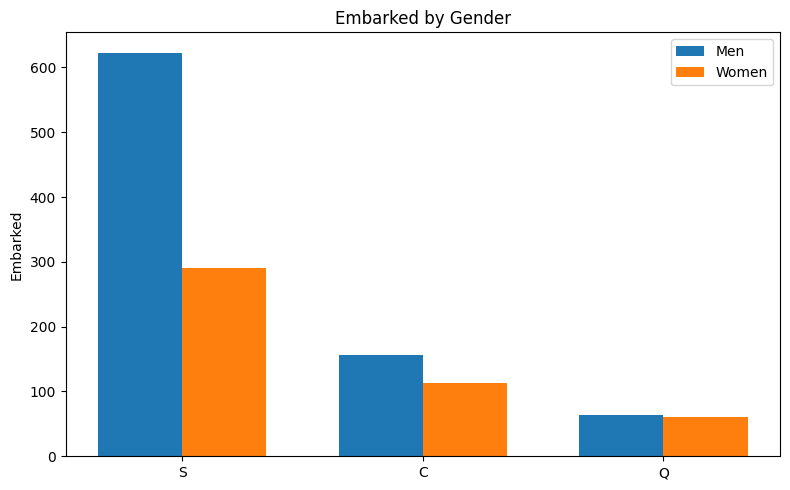

In [43]:
# useful for comparing things between different groups or to track changes over time
labels = df.Embarked.value_counts().index
men_embarked = df.loc[df.Sex=='male'].Embarked.value_counts()
women_embarked = df.loc[df.Sex=='female'].Embarked.value_counts()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, men_embarked, width, label='Men')
rects2 = ax.bar(x + width/2, women_embarked, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Embarked')
ax.set_title('Embarked by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

#### Histogram

''

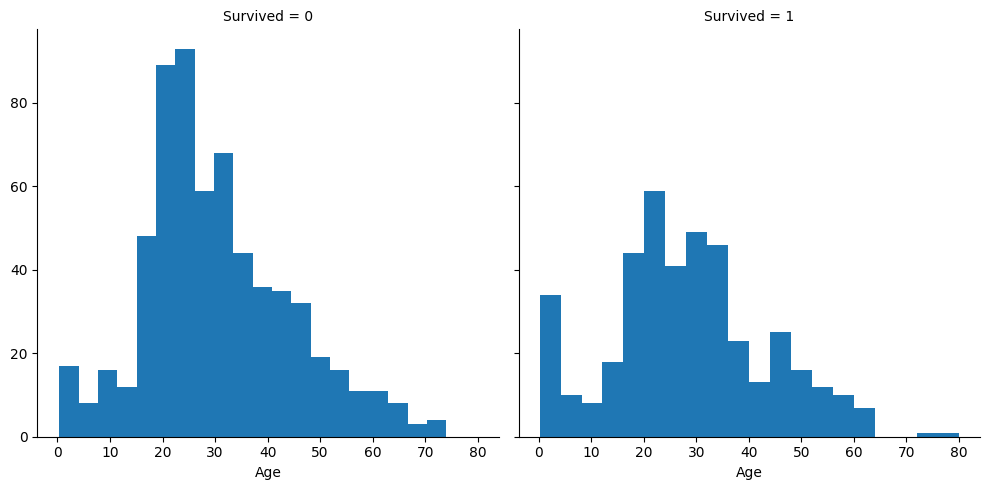

In [44]:
# useful for visualizing the distribution of the data
g = sns.FacetGrid(df, col='Survived', height=5)
g.map(plt.hist, 'Age', bins=20)
,

#### Groupby

In [47]:
# useful for splitting the data into groups and aggregating them using different operators (e.g. sum or size)
# here we split dataset by Sex and get the size (i.e. count) for each group
df.groupby('Sex').size()

,0
Sex,
female,466
male,843


In [49]:
# here we split dataset by Sex and get the mean value of other numeric variables for each group
df.groupby('Sex').mean(numeric_only=True)

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,28.687088,46.198097,0.633047,648.186695,2.154506,0.652361,0.82618
male,30.585228,26.154601,0.247924,658.766311,2.372479,0.413998,0.12930


In [50]:
# here we split dataset by Pclass and get the mean value of Survived for each group
# (i.e. the probability of surviving for each Pclass group)
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.575851
1,2,0.422383
2,3,0.269394


### Missing Value Imputation

In [51]:
# which columns have a missing value?
df.isnull().any(axis=0)

,0
Age,True
Cabin,True
Embarked,True
Fare,True
Name,False
Parch,False
PassengerId,False
Pclass,False
Sex,False
SibSp,False


In [52]:
# how many rows have a missing value?
df.isnull().any(axis=1).sum()

1039

In [53]:
# what percent of each column is missing?
df_nan = round(100*df.isna().sum()/df.shape[0],2)
index = df_nan.index

pd.DataFrame({ '% NaN': df_nan}, index=index).T

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
% NaN,20.09,77.46,0.15,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We see that ~77% and ~20 of values are missing for Cabin and Age columns respectively, while less than 1% are missing for Embarked and Fare columns

#### Age

The simplest approach is to replace all the missing values of Age by the overal mean of Age column (i.e. mean replacement). However, that would introduce bias. If we extract everybody's title from their names, that will give us a great grouping for replacing missing value by average age of each group (i.e. by title). That's the approach we will use here.

In [55]:
df.Name

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
1304,"Spector, Mr. Woolf"
1305,"Oliva y Ocana, Dona. Fermina"
1306,"Saether, Mr. Simon Sivertsen"
1307,"Ware, Mr. Frederick"


In [56]:
# extract titles from names
df['Title'] = [n.split(',')[1].strip().split('.')[0] for n in df.Name.astype(str)]

# replace missing Age values with the mean Age for each title group
for title in df['Title'].unique():
    value = int(df.loc[(df['Age'].notnull())&(df['Title']==title), 'Age'].mean())
    df.loc[(df['Age'].isnull())&(df['Title']==title),'Age'] = value

# Dropping the Title column
# df.drop('Title', axis=1, inplace=True)

In [58]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr


In [59]:
df.Age.describe()

,Age
count,1309.000000
mean,29.809526
std,13.201675
min,0.170000
25%,21.000000
50%,30.000000
75%,36.000000
max,80.000000


#### Cabin

Since the majority of Cabin values are missing, we may first decide to remove the column entirely. However, there's a clever way to retain some useful information from this column. If we look at the number of missing Cabin values for each Pclass group, we see that fewer passengers from Pclass 1 miss Cabin value compared to Pclass 2 and 3:

In [61]:
# how many Cabin values are missing per Pclass group?
df.drop('Pclass', axis=1)['Cabin'].isna().groupby(df.Pclass, sort=True).sum()

,Cabin
Pclass,
1,67
2,254
3,693


In [62]:
# how many passengers we have in each Pclass group?
df.groupby('Pclass').size()

,0
Pclass,
1,323
2,277
3,709


We also saw in the Groupby section above that survival rate correlates with Pclass. Therefore the fact that a passenger has Cabin value recorded can be predictive of their chance to survive (the target value in this problem). Therefore we create a new column called CabinRecorded.

In [63]:
# create a new column for CabinRecorded
df['CabinRecorded'] = 0
df.loc[df.Cabin.notnull(), 'CabinRecorded'] = 1
df.drop('Cabin', axis=1, inplace=True)

In [64]:
# how many passengers have CabinRecorded?
df.CabinRecorded.sum()

295

#### Embarked

There are only 2 missing values in the Embarked column. We simply replace missing Embarked values with the mode.

In [72]:
# replace missing Embarked values with the mode
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

#### Fare

There is only one missing value in the Fare column. Since Fare depends on the ticket class (i.e. Pclass), we replace missing Fare value using the mean value of Fare for the corresponding Pclass.

In [73]:
# replace missing Fare value
passenger_class = df.loc[df.Fare.isna(), 'Pclass'].iloc[0]
value = df.loc[(df.Fare.notnull()) & (df.Pclass == passenger_class), 'Fare'].mean()
df.Fare.fillna(value, inplace=True)

IndexError: single positional indexer is out-of-bounds

In [74]:
# what percent of each column is missing?
df_nan = round(100*df.isna().sum()/df.shape[0],2)
index = df_nan.index

pd.DataFrame({ '% NaN': df_nan}, index=index).T

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,CabinRecorded
% NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Great! There are no missing values anymore!

### Feature Engineering and Encoding

Let's see if we can create new features from the raw data to use in our machine learning model.

#### Age Categories

Here we are going to group the passengers by their age

In [75]:
# break passengers to age categories
bins = [0, 2, 12, 19, 25, 40, 60, np.inf]
labels = [lbl for lbl in range(len(bins)-1)]
df['AgeCategory'] = pd.cut(df.Age, bins=bins, labels=labels, right=True).astype(int)

#### Title

We previously extracted this feature from Name column. Let's take a look!

In [76]:
# value counts for Title column
df.Title.value_counts()

,count
Title,
Mr,757
Miss,260
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Mlle,2
Major,2


We can keep all these titles, but it will lead to too many features later when we perform one-hot-encoding. Therefore we only keep the 4 most common titles (Mr, Miss, Mrs, Master) and replace the rest with None.

In [77]:
# replace rare Titles with None
df.loc[~df.Title.isin(['Mr', 'Miss', 'Mrs', 'Master']), 'Title'] = None

#### Sex Label Encoding

Sex column is in string format (male and female). We convert them to numerical values.

In [78]:
# perform label encoding for Sex column
df.Sex = df.Sex.map({ 'male': 0, 'female': 1 })

#### Title and Embarked One Hot Encoding

Let's perform one hot encoding for Title and Embarked columns.

In [79]:
# one hot encoding of Embarked and Title columns
for column in ['Embarked', 'Title']:
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1).drop([column], axis=1)

#### Family Information

The SibSp column shows the # of siblings / spouses aboard the Titanic, while the Parch column shows the # of parents / children aboard the Titanic. We can use these two columns to create new features.

In [80]:
# family size for each passenger on Titanic
df['FamilySize'] = df.SibSp + df.Parch + 1

In [81]:
# is the passenger traveling alone or not?
df['IsAlone'] = 1
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0

In [82]:
# now let's drop columns that are not needed for machine learning
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

### Features Correlation

Let's see how our features correlate with each other and with the target variable (i.e. Survived)

''

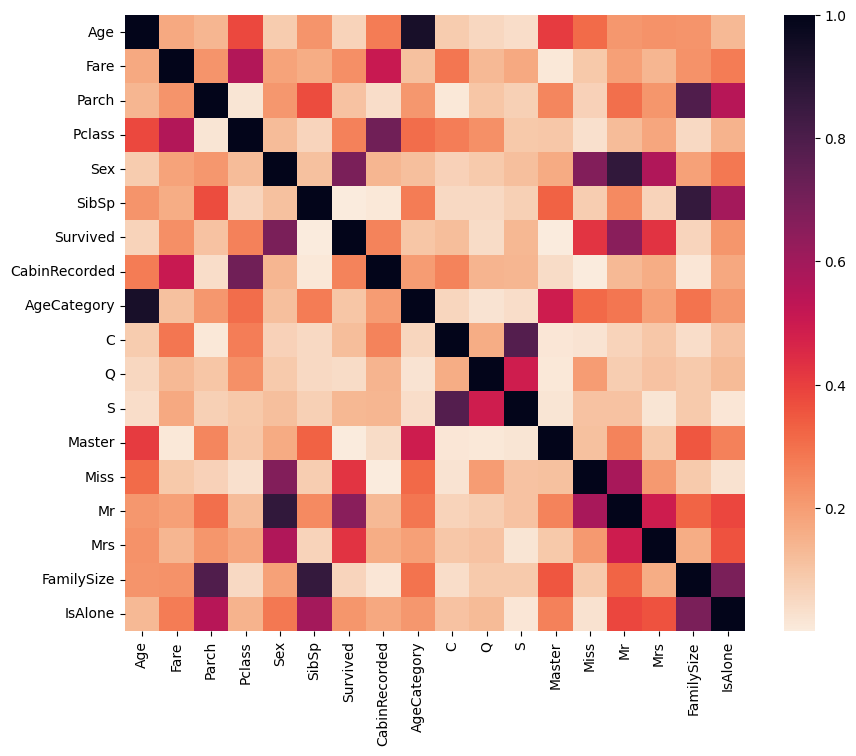

In [83]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')
,

In [84]:
# feature correlation with target variable
df.corr()['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Sex,0.688371
Mrs,0.426025
Miss,0.422198
CabinRecorded,0.259023
Fare,0.233785
C,0.121156
Parch,0.108919
FamilySize,0.061090
Q,0.040950


### Partitioning the Data

In [85]:
# independent variables
X = df.drop(['Survived'], axis=1)
# dependent/target variable
y = df.Survived

# divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In this step we scale input variables between 0 and 1

In [86]:
# scale the data between 0 and 1
transformer = Normalizer(norm='max').fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

### Modeling

We will train 4 different model types:
- Logistic Regression
- Support Vector Machine
- Random Forest Classifier
- Gradient Boosting Classifier

#### Logistic Regression

In [87]:
# define the model
lrg = LogisticRegression(class_weight='balanced', random_state=0)

In [88]:
# train the model
lrg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [89]:
# predict the result using the trained model
y_pred_lrg = lrg.predict(X_test)

In [90]:
# overall acuracy of the model
accuracy_score(y_test, y_pred_lrg)

0.683206106870229

In [91]:
# f1 score of the model
f1_score(y_test, y_pred_lrg)

0.6103286384976526

#### Support Vector Machine

In [92]:
# define the model
svm = SVC(kernel='rbf', gamma='auto', random_state=0, class_weight='balanced')

In [93]:
# train the model
svm.fit(X_train, y_train)

SVC(class_weight='balanced', gamma='auto', random_state=0)

In [94]:
# predict the result using the trained model
y_pred_svm = svm.predict(X_test)

In [95]:
# overall acuracy of the model
accuracy_score(y_test, y_pred_svm)

0.6564885496183206

In [96]:
# f1 score of the model
f1_score(y_test, y_pred_svm)

0.5794392523364487

#### Random Forest Classifier

In [97]:
# define the model
rfc = RandomForestClassifier(n_estimators=500, random_state=0, class_weight='balanced')

In [98]:
# train the model
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=0)

In [99]:
# predict the result using the trained model
y_pred_rfc = rfc.predict(X_test)

In [100]:
# overall acuracy of the model
accuracy_score(y_test, y_pred_rfc)

0.8091603053435115

In [101]:
# f1 score of the model
f1_score(y_test, y_pred_rfc)

0.7596153846153846

#### Gradient Boosting Classifier

In [102]:
# define the model
gbc = GradientBoostingClassifier(n_estimators=500, random_state=0)

In [103]:
# train the model
gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500, random_state=0)

In [104]:
# predict the result using the trained model
y_pred_gbc = gbc.predict(X_test)

In [105]:
# overall acuracy of the model
accuracy_score(y_test, y_pred_gbc)

0.8282442748091603

In [106]:
# f1 score of the model
f1_score(y_test, y_pred_gbc)

0.7783251231527093